In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

E = np.array([1,0.8,0.6,0.4,0.2,0,-0.2])
V = np.array([667000.0,526000.0,400000.0,262000.0,131000.0,0.0,-131000.0])
Ej = E*1.6*(10**(-19))

def modele(x, p):
    return x/p

# Paramètres initiaux
p = 1e-24
p0 = np.array([p]) 

# Ajustement
popt, cov = curve_fit(modele, Ej, V, p0=p0)
f_opti = popt # les paramètres d'ajustement

print(f_opti)

[2.41346801e-25]


In [29]:
plt.figure(figsize=(10,8))
plt.title('Modalisation proportionnelle de V(phi) selon E/p')
plt.xlabel('Energie en Joules')
plt.ylabel('V(phi)')
plt.scatter(Ej,V, label = 'Mesures de V(phi) expérimentales')
plt.plot(Ej, Ej/f_opti, label = 'Modèle')
plt.text(1, 0, f'Modèle: p = {f_opti[0]:.2E}')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

ValueError: Image size of 1662517248x699 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x800 with 1 Axes>

[ 0.50660934 35.20708428]


<function matplotlib.pyplot.show(close=None, block=None)>

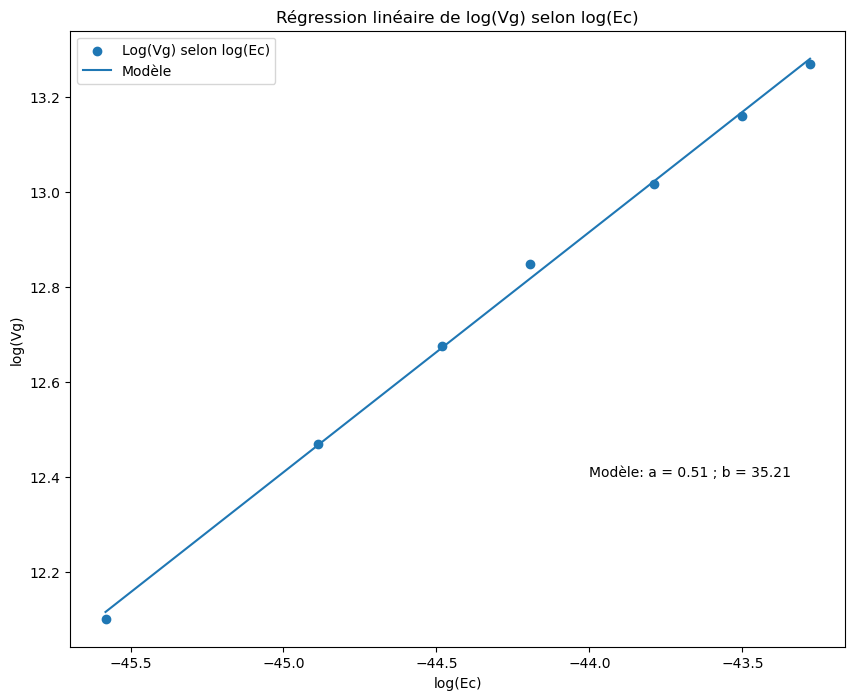

In [19]:
Ec = np.array([1,0.8,0.6,0.4,0.3,0.2,0.1])
Vg = np.array([580000,520000,450000,380000,320000,260000,180000])
Ecj = Ec*1.6*(10**(-19))

logEcj = np.log(Ecj)
logVg = np.log(Vg)

def modele2(x, p, q):
    return p*x + q

# Paramètres initiaux
p1 = np.array([2.0, 1]) 

# Ajustement
popt, cov = curve_fit(modele2, logEcj, logVg, p0=p1)
f_opti2 = popt # les paramètres d'ajustement

print(f_opti2)

plt.figure(figsize=(10,8))
plt.title('Régression linéaire de log(Vg) selon log(Ec)')
plt.xlabel('log(Ec)')
plt.ylabel('log(Vg)')
plt.scatter(logEcj,logVg, label = 'Log(Vg) selon log(Ec)')
plt.plot(logEcj, logEcj*f_opti2[0] + f_opti2[1], label = 'Modèle')
plt.text(-44, 12.4, f'Modèle: a = {round(f_opti2[0],2)} ; b = {round(f_opti2[1],2)}')
plt.legend()
plt.show
